In [5]:
def evaluate_classifier_noise(df_positive, df_negative, pos_label=1, neg_label=0, title_suffix=""):
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import cross_val_predict
    from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

    #Labels
    df_positive['Label'] = pos_label
    df_negative['Label'] = neg_label

    # Kombinieren
    data = pd.concat([df_positive, df_negative], ignore_index=True)

    # Visualisierung
    sns.histplot(data=data, x='Score', hue='Label', kde=True, bins=50)
    plt.title(f"Distribution of Score {title_suffix}")
    plt.xlabel("Score")
    plt.ylabel("Numbers")
    plt.show()

    # Vorbereitung
    X = data[['Score']]
    y = data['Label']
    model = RandomForestClassifier(n_estimators=100, random_state=42)

    # Cross-Validation
    y_pred = cross_val_predict(model, X, y, cv=5, method='predict')
    y_proba = cross_val_predict(model, X, y, cv=5, method='predict_proba')[:, 1]

    # Auswertung
    print(" Confusion Matrix:\n", confusion_matrix(y, y_pred))
    print("\n Classification Report:\n", classification_report(y, y_pred))

    # ROC
    fpr, tpr, thresholds = roc_curve(y, y_proba)
    roc_auc = auc(fpr, tpr)

    # Plot ROC
    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC (AUC = {roc_auc:.2f})", color='red')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC-Curve {title_suffix}")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

In [3]:
import pandas as pd

df_sissi = pd.DataFrame(pd.read_excel("C:/bla/Waste/MA/2.Versuch/MXfold2_Excel/sissi.xlsx", usecols=['Score']))
df_sissiz_mono = pd.DataFrame(pd.read_excel("C:/bla/Waste/MA/2.Versuch/MXfold2_Excel/sissiz_mono.xlsx", usecols=['Score']))
df_sissiz_di = pd.DataFrame(pd.read_excel("C:/bla/Waste/MA/2.Versuch/MXfold2_Excel/sissiz_di.xlsx", usecols=['Score']))
df_multiperm_mono = pd.DataFrame(pd.read_excel("C:/bla/Waste/MA/2.Versuch/MXfold2_Excel/multiperm_mono.xlsx", usecols=['Score']))
df_multiperm_di = pd.DataFrame(pd.read_excel("C:/bla/Waste/MA/2.Versuch/MXfold2_Excel/multiperm_di.xlsx", usecols=['Score']))
df_aln_shuffle = pd.DataFrame(pd.read_excel("C:/bla/Waste/MA/2.Versuch/MXfold2_Excel/alifoldz.xlsx", usecols=['Score']))

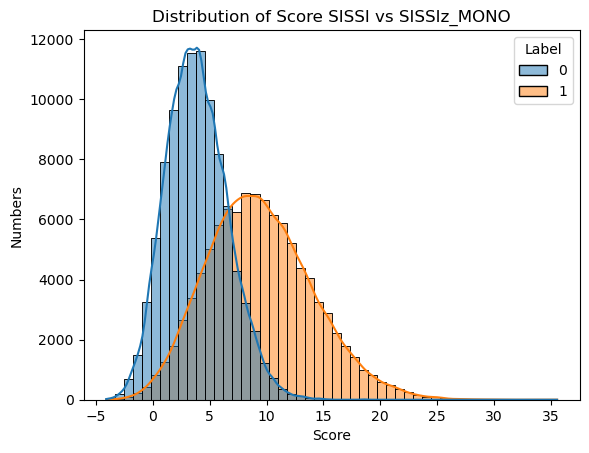

 Confusion Matrix:
 [[84465 15535]
 [28569 71431]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.84      0.79    100000
           1       0.82      0.71      0.76    100000

    accuracy                           0.78    200000
   macro avg       0.78      0.78      0.78    200000
weighted avg       0.78      0.78      0.78    200000



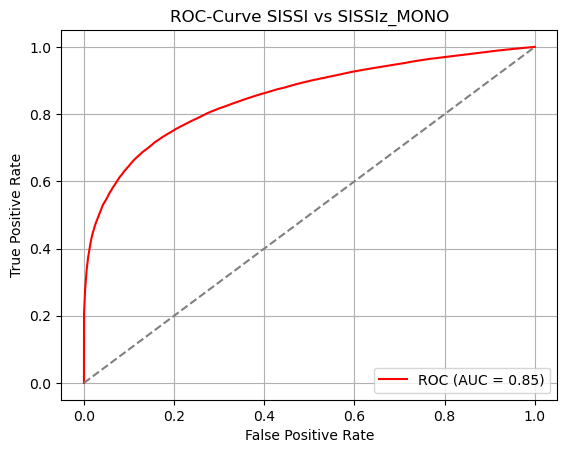

In [6]:
evaluate_classifier_noise(df_sissi, df_sissiz_mono, title_suffix="SISSI vs SISSIz_MONO")

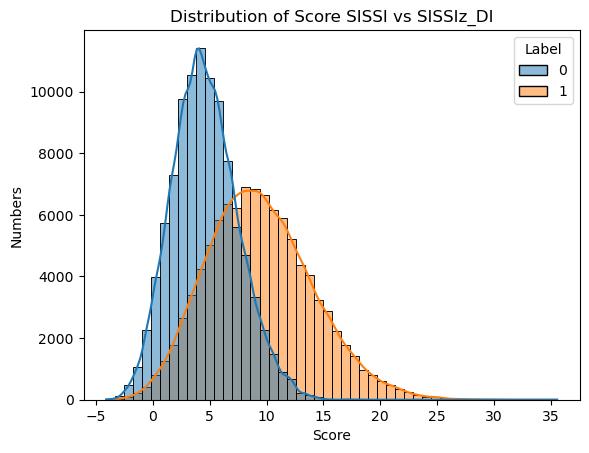

 Confusion Matrix:
 [[82454 17546]
 [34018 65982]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.82      0.76    100000
           1       0.79      0.66      0.72    100000

    accuracy                           0.74    200000
   macro avg       0.75      0.74      0.74    200000
weighted avg       0.75      0.74      0.74    200000



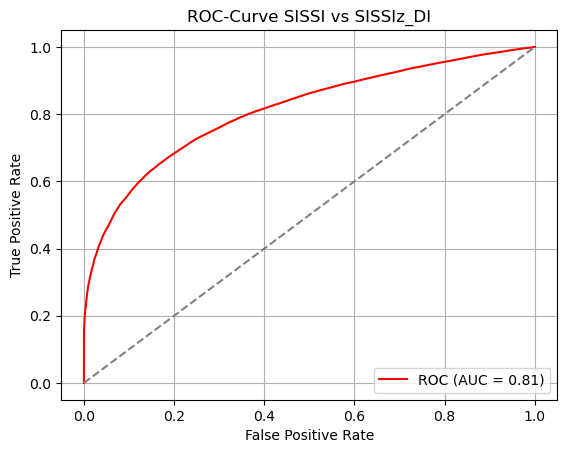

In [8]:
evaluate_classifier_noise(df_sissi, df_sissiz_di, title_suffix="SISSI vs SISSIz_DI")

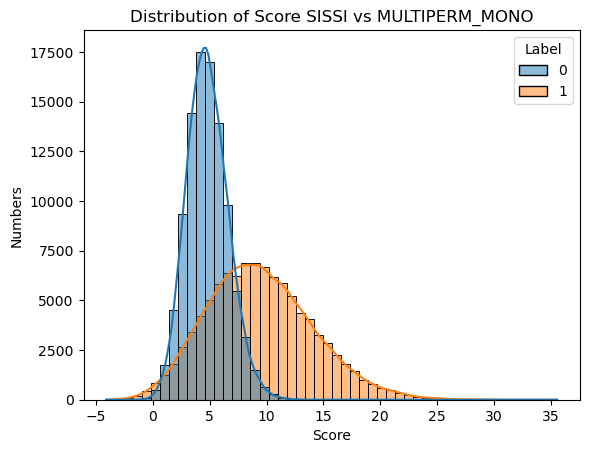

 Confusion Matrix:
 [[90166  9834]
 [32476 67524]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.90      0.81    100000
           1       0.87      0.68      0.76    100000

    accuracy                           0.79    200000
   macro avg       0.80      0.79      0.79    200000
weighted avg       0.80      0.79      0.79    200000



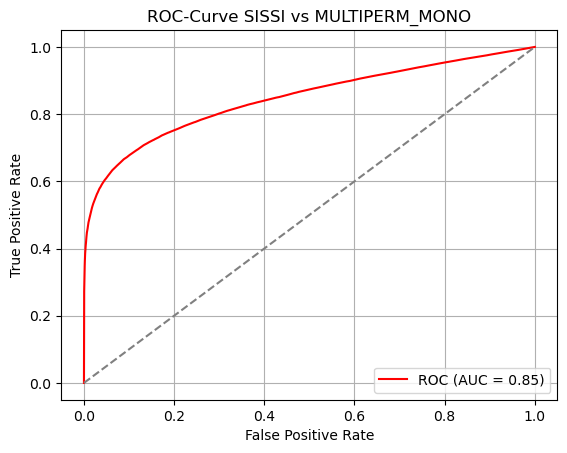

In [9]:
evaluate_classifier_noise(df_sissi, df_multiperm_mono, title_suffix="SISSI vs MULTIPERM_MONO")

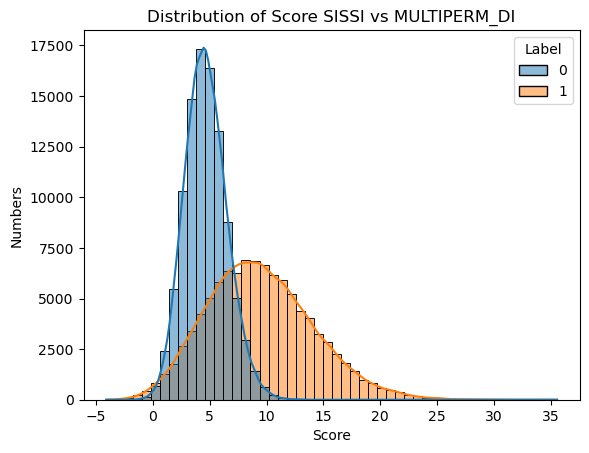

 Confusion Matrix:
 [[89417 10583]
 [31270 68730]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.89      0.81    100000
           1       0.87      0.69      0.77    100000

    accuracy                           0.79    200000
   macro avg       0.80      0.79      0.79    200000
weighted avg       0.80      0.79      0.79    200000



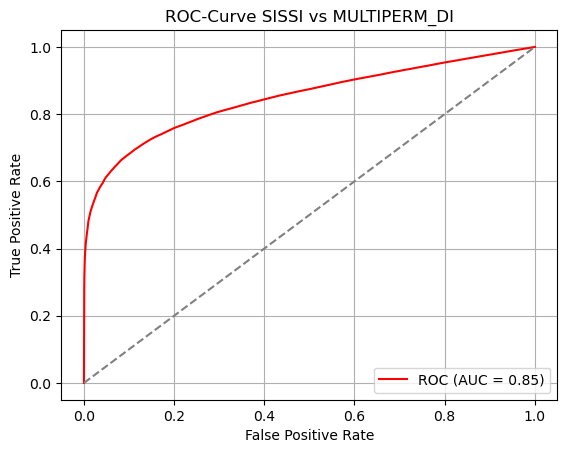

In [10]:
evaluate_classifier_noise(df_sissi, df_multiperm_di, title_suffix="SISSI vs MULTIPERM_DI")

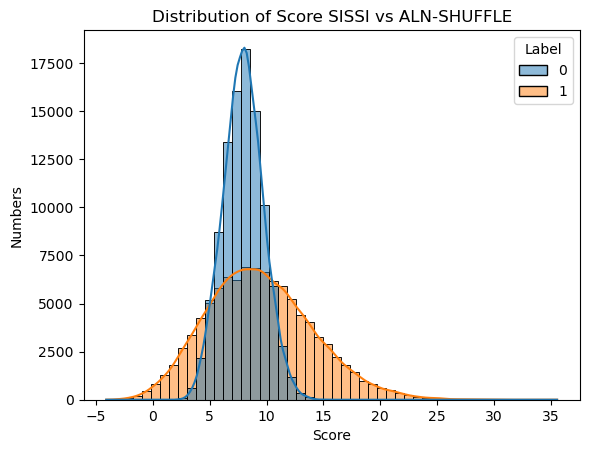

 Confusion Matrix:
 [[87309 12691]
 [44002 55998]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.87      0.75    100000
           1       0.82      0.56      0.66    100000

    accuracy                           0.72    200000
   macro avg       0.74      0.72      0.71    200000
weighted avg       0.74      0.72      0.71    200000



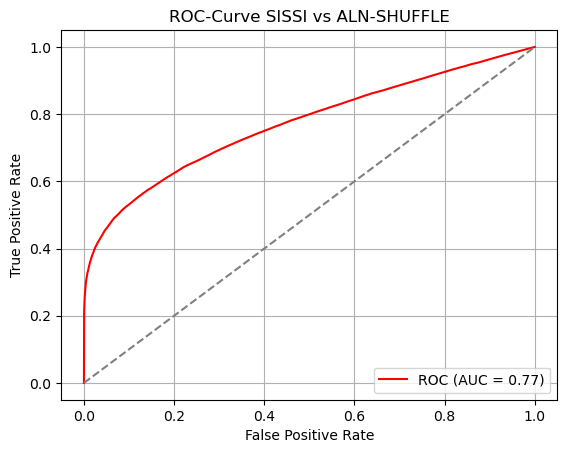

In [11]:
evaluate_classifier_noise(df_sissi, df_aln_shuffle, title_suffix="SISSI vs ALN-SHUFFLE")